In [2]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
local_weights_file='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model=InceptionV3(input_shape=(160,120,3),
                             include_top=False,
                             weights=None)

pre_trained_model.load_weights(local_weights_file)

In [6]:
for layer in pre_trained_model.layers:
    layer.trainable=False

In [7]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 120, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 79, 59, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 79, 59, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 79, 59, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [8]:
last_layer=pre_trained_model.get_layer("mixed7")
last_output=last_layer.output

In [9]:
from tensorflow.keras.optimizers import RMSprop

In [10]:
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dense(6,activation='softmax')(x)

In [11]:
model=Model(pre_trained_model.input,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
training_datagen=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen=ImageDataGenerator(
                    rescale=1./255)

In [13]:
validation_dir='Output/val'
train_dir='Output/train'

In [14]:
train_generator=training_datagen.flow_from_directory(
                    train_dir,
                     batch_size=47,
                    target_size=(160,120),
                    class_mode='categorical')



validation_generator=validation_datagen.flow_from_directory(
                    validation_dir,
                     batch_size=47,
                    target_size=(160,120),
                    class_mode='categorical')

Found 11280 images belonging to 6 classes.
Found 2820 images belonging to 6 classes.


In [15]:
history=model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            epochs=20,
                            steps_per_epoch=40,
                            verbose=2)
model.save('model2.h5')

Epoch 1/20
40/40 - 117s - loss: 1.9682 - acc: 0.3484 - val_loss: 1.5085 - val_acc: 0.4216
Epoch 2/20
40/40 - 122s - loss: 1.1786 - acc: 0.4537 - val_loss: 1.1081 - val_acc: 0.5110
Epoch 3/20
40/40 - 126s - loss: 1.1075 - acc: 0.4761 - val_loss: 1.2925 - val_acc: 0.5039
Epoch 4/20
40/40 - 133s - loss: 1.0841 - acc: 0.4777 - val_loss: 1.0863 - val_acc: 0.5259
Epoch 5/20
40/40 - 123s - loss: 1.0378 - acc: 0.5122 - val_loss: 1.1134 - val_acc: 0.4855
Epoch 6/20
40/40 - 120s - loss: 1.0199 - acc: 0.5090 - val_loss: 1.2109 - val_acc: 0.4883
Epoch 7/20
40/40 - 114s - loss: 0.9803 - acc: 0.5356 - val_loss: 1.1640 - val_acc: 0.5142
Epoch 8/20
40/40 - 112s - loss: 0.9736 - acc: 0.5144 - val_loss: 1.1322 - val_acc: 0.5184
Epoch 9/20
40/40 - 148s - loss: 0.9361 - acc: 0.5436 - val_loss: 1.4198 - val_acc: 0.4943
Epoch 10/20
40/40 - 128s - loss: 0.9492 - acc: 0.5404 - val_loss: 1.3984 - val_acc: 0.4936
Epoch 11/20
40/40 - 114s - loss: 0.9484 - acc: 0.5362 - val_loss: 0.9962 - val_acc: 0.5539
Epoch 12

<Figure size 432x288 with 0 Axes>

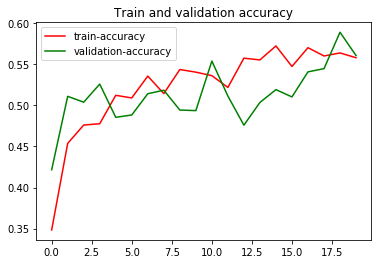

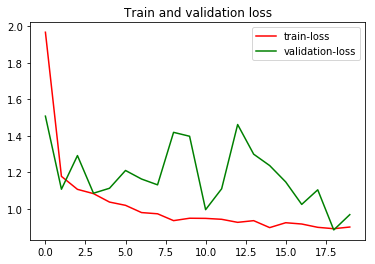

<Figure size 432x288 with 0 Axes>

In [16]:
validation_accuracy=history.history['val_acc']
train_accuracy=history.history['acc']

validation_loss=history.history['val_loss']
train_loss=history.history['loss']

epochs=range(len(train_accuracy))

plt.plot(epochs,train_accuracy,'r',label='train-accuracy')
plt.plot(epochs,validation_accuracy,'g',label='validation-accuracy')
plt.title("Train and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,train_loss,'r',label='train-loss')
plt.plot(epochs,validation_loss,'g',label='validation-loss')
plt.title("Train and validation loss")
plt.legend()
plt.figure()